#Import all necessary Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

#Read DataSets


In [89]:
df = pd.read_csv(r'C:\Users\kevin\Downloads\EEG.machinelearing_data_BRMH.csv')

##Check Attributes

In [90]:
df.shape

(945, 1149)

In [91]:
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [92]:
df.tail()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446
944,945,M,21.0,2015.10.23,13.0,105.0,Healthy control,Healthy control,65.195346,69.241972,...,78.600293,68.255430,70.687410,74.433908,74.294750,53.254681,72.755265,47.810386,80.166825,64.380273


In [93]:
df.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


Found typo error in specific disorder(not edited as per current requirements)

#Check Duplicates

In [94]:
df.duplicated().sum()

np.int64(0)

#Check Missing Values

In [95]:
missing_values = df.isna().sum()
missing_value_columns = missing_values[missing_values > 0]
print(missing_value_columns)

education        15
IQ               13
Unnamed: 122    945
dtype: int64


Here ID and Education has missing values

#EDA(Exploratory data analysis)

<Axes: xlabel='sex', ylabel='count'>

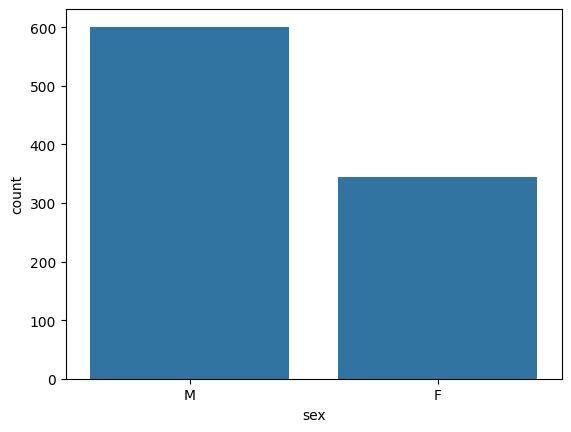

In [96]:
sns.countplot(x= df.sex)

<Axes: xlabel='count', ylabel='main.disorder'>

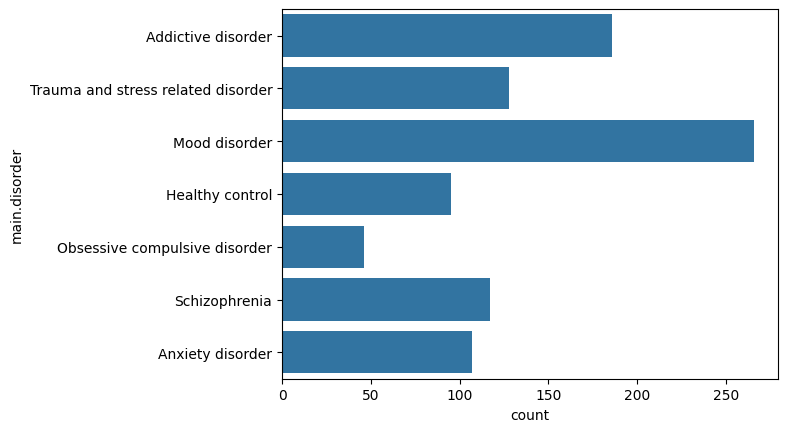

In [97]:
sns.countplot(y=df['main.disorder'])

In [98]:
df.columns

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

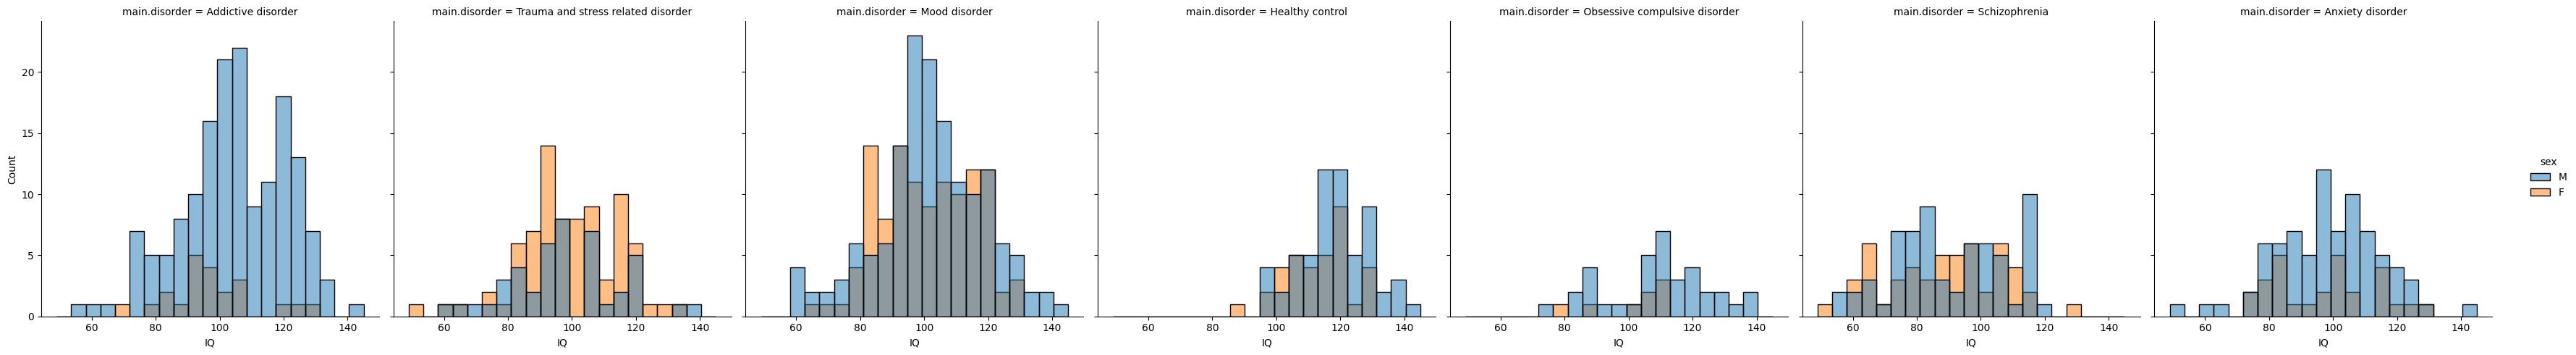

In [99]:
sns.displot(x=df['IQ'], col=df['main.disorder'], hue=df['sex'])
plt.show()

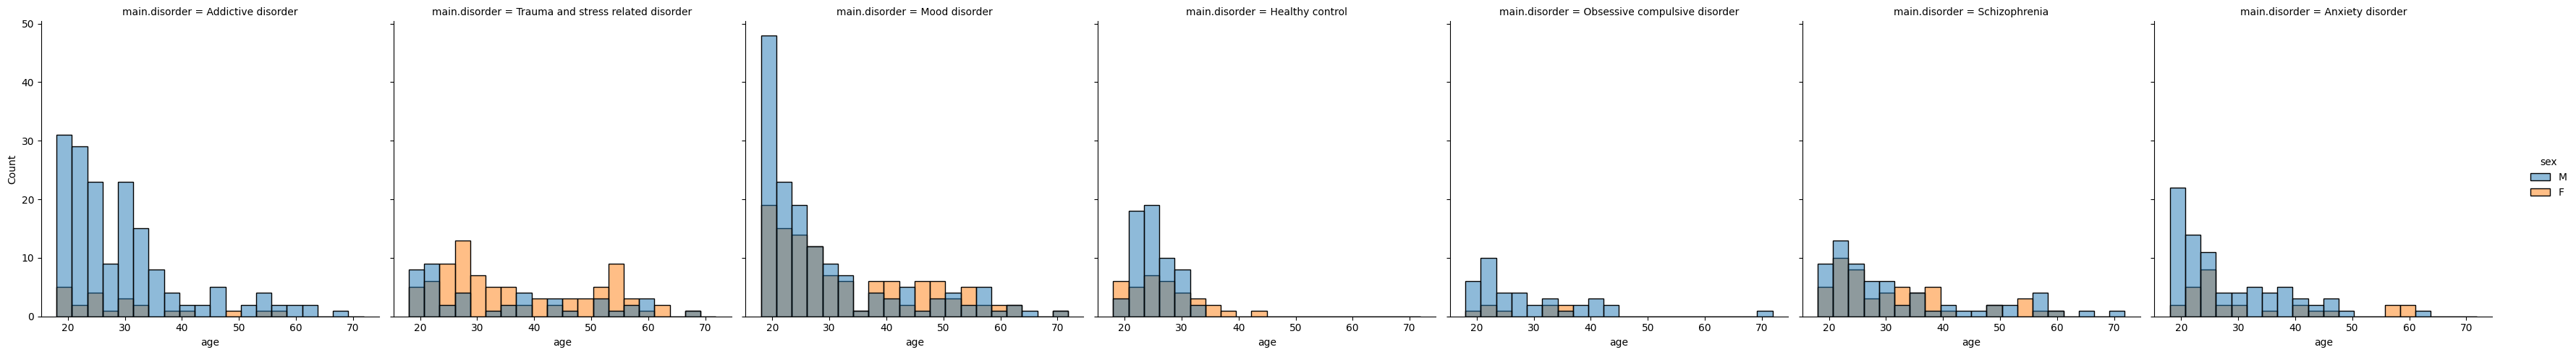

In [100]:
sns.displot(x=df['age'], col=df['main.disorder'], hue=df['sex'])
plt.show()

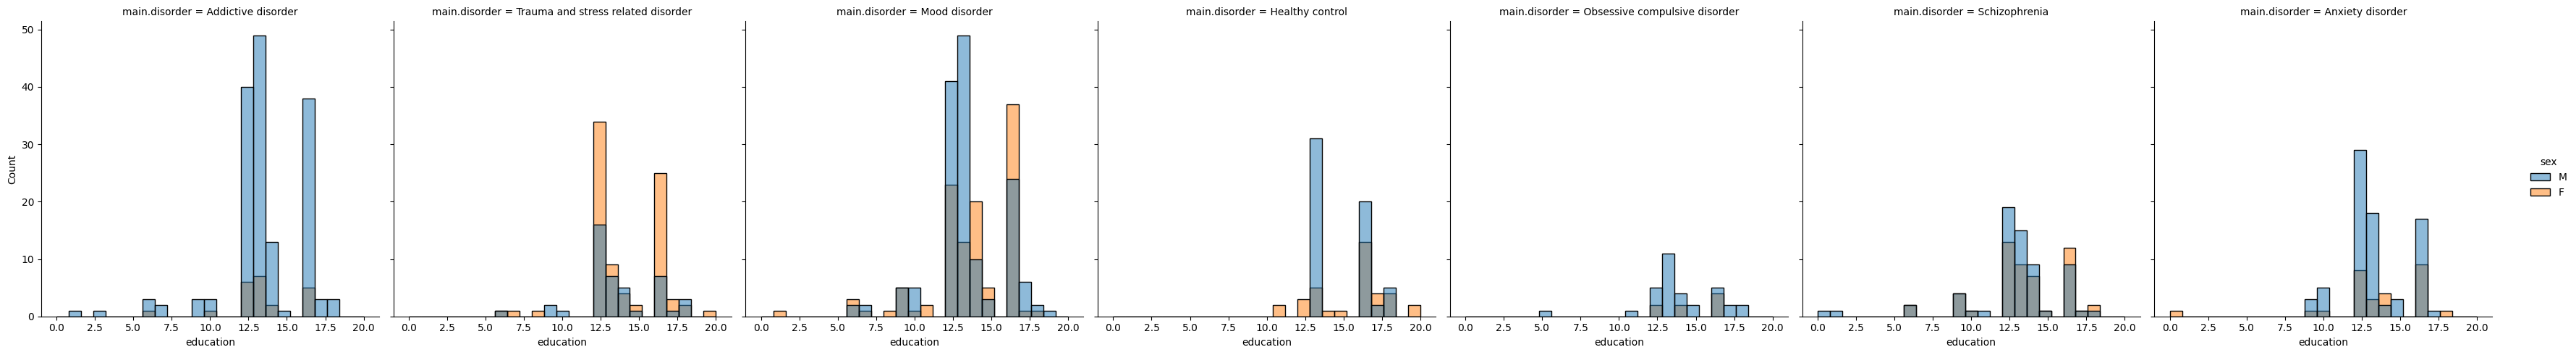

In [101]:
sns.displot(x=df['education'], col=df['main.disorder'], hue=df['sex'])
plt.show()

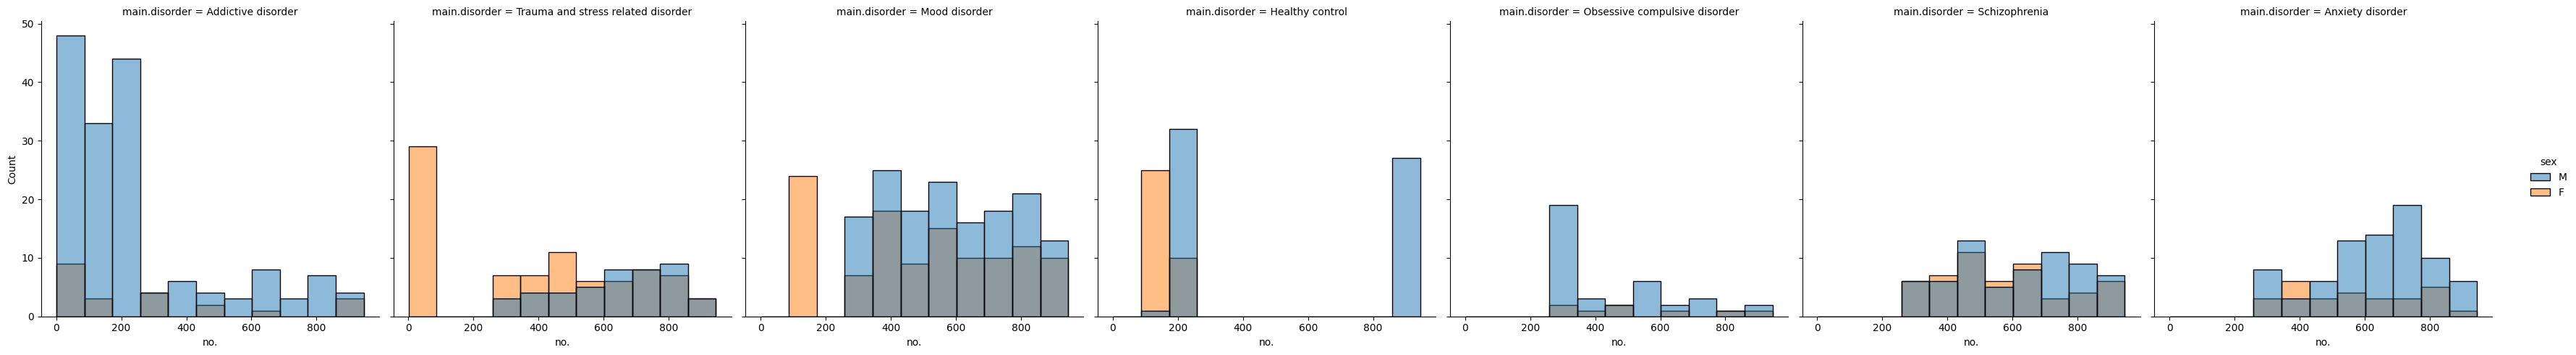

In [102]:
sns.displot(x=df['no.'], col=df['main.disorder'], hue=df['sex'])
plt.show()

This shows age, education and IQ has a relation with mental disorders.
Age also shows a relation(Further check suggested)

In [103]:
df.columns
#As age 

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

#Removing Specific disorder as they are not important rn

In [104]:
df_edited = df.drop('specific.disorder', axis=1)
print(df_edited)

     no. sex   age    eeg.date  education     IQ       main.disorder  \
0      1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1      2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2      3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3      4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4      5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ...  ..   ...         ...        ...    ...                 ...   
940  941   M  22.0   2014.8.28       13.0  116.0     Healthy control   
941  942   M  26.0   2014.9.19       13.0  118.0     Healthy control   
942  943   M  26.0   2014.9.27       16.0  113.0     Healthy control   
943  944   M  24.0   2014.9.20       13.0  107.0     Healthy control   
944  945   M  21.0  2015.10.23       13.0  105.0     Healthy control   

     AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  ...  \
0           35.998557         21.717375        21.518280  ...   
1    

#Making Non numeric feature main.disorder to numeric by using label encoder

In [105]:
encoder = LabelEncoder()
df_edited['main.disorder'] = encoder.fit_transform(df_edited['main.disorder'])
print(df_edited)

     no. sex   age    eeg.date  education     IQ  main.disorder  \
0      1   M  57.0   2012.8.30        NaN    NaN              0   
1      2   M  37.0    2012.9.6        6.0  120.0              0   
2      3   M  32.0   2012.9.10       16.0  113.0              0   
3      4   M  35.0   2012.10.8       18.0  126.0              0   
4      5   M  36.0  2012.10.18       16.0  112.0              0   
..   ...  ..   ...         ...        ...    ...            ...   
940  941   M  22.0   2014.8.28       13.0  116.0              2   
941  942   M  26.0   2014.9.19       13.0  118.0              2   
942  943   M  26.0   2014.9.27       16.0  113.0              2   
943  944   M  24.0   2014.9.20       13.0  107.0              2   
944  945   M  21.0  2015.10.23       13.0  105.0              2   

     AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  ...  \
0           35.998557         21.717375        21.518280  ...   
1           13.425118         11.002916        11.942516  ...   


#Converting Sex column to numeric

In [106]:
df_edited = pd.get_dummies(data=df_edited, columns=['sex'])

#Null Value Treatment

In [107]:
df_edited.isna().sum()

no.                       0
age                       0
eeg.date                  0
education                15
IQ                       13
                         ..
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
sex_F                     0
sex_M                     0
Length: 1149, dtype: int64

In [108]:
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(df_edited[['education', 'IQ']])
df_imputed = pd.DataFrame(df_imputed, columns=['education', 'IQ'])
#print(df_imputed)
df_edited[['education', 'IQ']] = df_imputed


##Finding the Unnamed column name

In [109]:
unname_index = df_edited.columns.get_loc('Unnamed: 122')
print(unname_index)

120


In [110]:
print(df_edited.iloc[:,120])
#Name: AB.F.gamma.s.O2
print(df_edited.iloc[:,122])
#Name: COH.A.delta.a.FP1.b.FP2

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
940   NaN
941   NaN
942   NaN
943   NaN
944   NaN
Name: Unnamed: 122, Length: 945, dtype: float64
0      40.235120
1      60.256175
2      79.309590
3      41.589723
4      41.839478
         ...    
940    26.753708
941    62.958227
942    99.532797
943    70.329473
944    68.369003
Name: COH.A.delta.a.FP1.c.F7, Length: 945, dtype: float64


In [111]:
df_new = df_edited.drop(columns=['Unnamed: 122'], axis=1)
missing = df_new.isna().sum()
missing_cols = missing[missing > 0]
df_new.shape
#Initial Shape- (945, 1149)
#Final shape- (945, 1147) //dropped specific disorder and unnamed 122

(945, 1148)

#Fitting to model